In [1]:
#2000-2022:

import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def gompertz(t, L, K, T):
    return L * np.exp(-np.exp(-K * (t - T)))

def logistic(t, L, K, T):
    return L / (1 + np.exp(-K * (t - T)))

def analyze_data_with_selected_years_mape(filename, variable, category, unit, country):
    df = pd.read_csv(filename)

    filtered_df = df[(df['Variable'] == variable) & (df['Category'] == category)
                     & (df['Unit'] == unit) & (df['Area'] == country)]

    if filtered_df.empty:
        print(f"No data available for {country} with the provided filters.")
        return
    
    global_data = filtered_df.groupby('Year')['Value'].sum()

    selected_years_data = global_data.loc[2000:2022]

    x = selected_years_data.index.values 
    y = selected_years_data.values

    if len(y) == 0 or len(x) == 0:
        print("No data available for the provided filters.")
        return
    
    max_year = x.max()

    initial_L = max(y)
    initial_K = 1.0
    initial_T = x.mean()

    popt_gompertz, _ = curve_fit(gompertz, x, y, p0=[initial_L, initial_K, initial_T])
    y_pred_gompertz = gompertz(x, *popt_gompertz)
    
    popt_logistic, _ = curve_fit(logistic, x, y, p0=[initial_L, initial_K, initial_T])
    y_pred_logistic = logistic(x, *popt_logistic)
    
    mape_gompertz = np.mean(np.abs((y - y_pred_gompertz) / y)) * 100
    mape_logistic = np.mean(np.abs((y - y_pred_logistic) / y)) * 100
    
    print(f"Mean Absolute Percentage Error (2000-2022) using Gompertz model: {mape_gompertz:.2f}%")
    print(f"Mean Absolute Percentage Error (2000-2022) using Logistic model: {mape_logistic:.2f}%")
    
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, label=f'{variable} Historical Data (2000-2022)')
    t = np.linspace(2000, 2022, 500)
    
    plt.plot(t, logistic(t, *popt_logistic), 'r-', label='Fitted logistic function')
    plt.plot(t, gompertz(t, *popt_gompertz), 'g-', label='Fitted gompertz function')
    
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
    plt.xlabel('Year',fontsize=12)
    plt.ylabel(f'{country} - {variable} Electricity Generation(TWh)',fontsize=12)
    plt.grid()
    plt.show()

Mean Absolute Percentage Error (2000-2022) using Gompertz model: 25.15%
Mean Absolute Percentage Error (2000-2022) using Logistic model: 76.12%


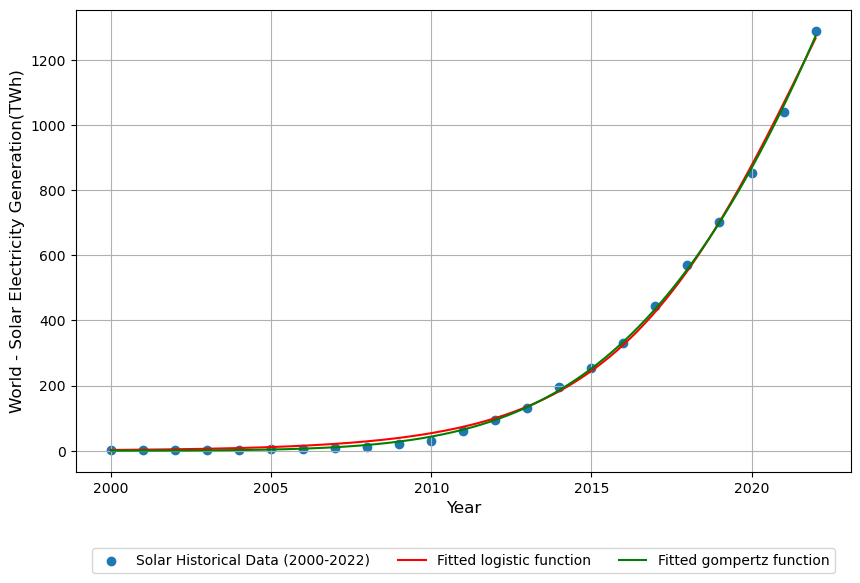

In [12]:
analyze_data_with_selected_years_mape('Data.csv', 'Solar', 'Electricity generation', 'TWh', 'World')

In [20]:
#2016-2022:

def analyze_data_with_selected_years_mape(filename, variable, category, unit, country):
    df = pd.read_csv(filename)

    # Filter the DataFrame based on your conditions
    filtered_df = df[(df['Variable'] == variable) & (df['Category'] == category)
                     & (df['Unit'] == unit) & (df['Area'] == country)]

    if filtered_df.empty:
        print(f"No data available for {country} with the provided filters.")
        return
    
    global_data = filtered_df.groupby('Year')['Value'].sum()

    # Get data from 2000 to 2015 for fitting
    training_data = global_data.loc[2000:2015]
    x_train = training_data.index.values 
    y_train = training_data.values

    # Get data from 2016 to 2022 for testing
    test_data = global_data.loc[2016:2022]
    x_test = test_data.index.values 
    y_test = test_data.values
    
    if len(y_train) == 0 or len(x_train) == 0 or len(y_test) == 0 or len(x_test) == 0:
        print("No data available for the provided filters.")
        return
    
    max_year = x_train.max()

    # Initial parameters
    initial_L = max(y_train)
    initial_K = 1.0
    initial_T = x_train.mean()

    # Fit the Gompertz function on the training data
    popt_gompertz, _ = curve_fit(gompertz, x_train, y_train, p0=[initial_L, initial_K, initial_T],maxfev=10000)
    y_pred_gompertz = gompertz(x_test, *popt_gompertz)
    
    # Fit the logistic function on the training data
    popt_logistic, _ = curve_fit(logistic, x_train, y_train, p0=[initial_L, initial_K, initial_T],maxfev=10000)
    y_pred_logistic = logistic(x_test, *popt_logistic)
    
    # Calculate MAPE for both models
    mape_gompertz = np.mean(np.abs((y_test - y_pred_gompertz) / y_test)) * 100
    mape_logistic = np.mean(np.abs((y_test - y_pred_logistic) / y_test)) * 100
    
    # Print the results
    print(f"Mean Absolute Percentage Error (2016-2022) using Gompertz model: {mape_gompertz:.2f}%")
    print(f"Mean Absolute Percentage Error (2016-2022) using Logistic model: {mape_logistic:.2f}%")
    
    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.scatter(x_test, y_test, label=f'{variable} Actual Data (2016-2022)')
    plt.plot(x_test, y_pred_logistic, 'r-', label='Predicted using logistic function')
    plt.plot(x_test, y_pred_gompertz, 'g-', label='Predicted using gompertz function')
    
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
    plt.xlabel('Year',fontsize=12)
    plt.ylabel(f'{country} - {variable} {unit}',fontsize=12)
    plt.grid()
    plt.show()


Mean Absolute Percentage Error (2016-2022) using Gompertz model: 15.65%
Mean Absolute Percentage Error (2016-2022) using Logistic model: 38.76%


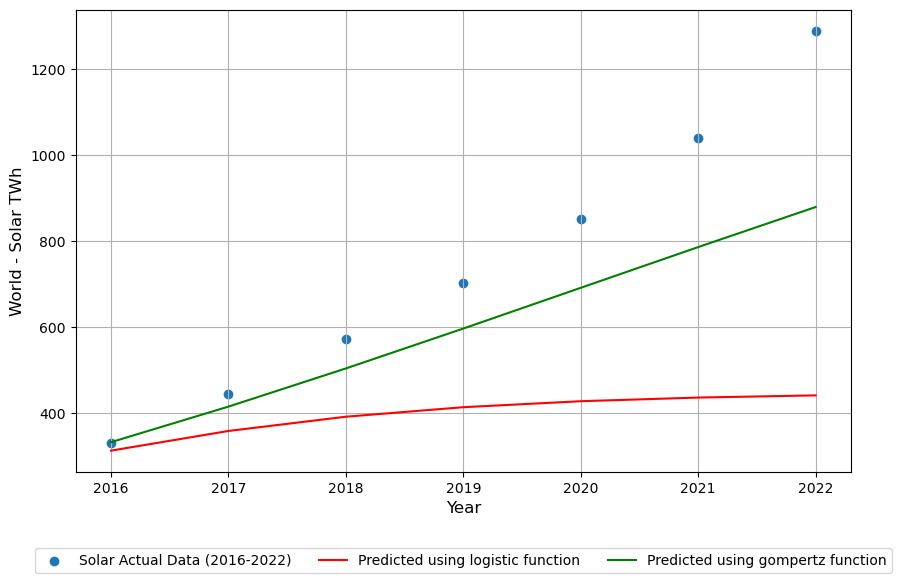

In [21]:
analyze_data_with_selected_years_mape('Data.csv', 'Solar', 'Electricity generation', 'TWh', 'World')